In [214]:
import sys
import sympy as sy
import math
from scipy import stats
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from scipy.stats import binom, poisson, norm 
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r'/home/saim/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

### Problem: Produce - using the ACCEPT/REJECT METHOD - random points following $f(x) = 2x, x \in [0, 1]$.

To produce random numbers according to $f(x)$ the Monte Carlo accept/reject method is used.
Since this is bounded by $[0,1] \times [0,2]$, this is the range we generate numbers in.

In [ ]:
r = np.random
r.seed(42)
N_points = 10000      # Number of random points to be produced!
N_bins = 100

In [ ]:
# Define f(x) = 2x, for x in [0,1]
x_min = 0.0           # minimum value x can take
x_max = 1.0           # max value x can take

def fx_2x(x) :
    # Normalization is N_points * binwidth:
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N * 2*x

In [33]:
x_accepted = np.zeros(N_points) # Empty array to be filled in with accepted values

y_min = 0             # min value y can take
y_max = 2             # max value y can take

for i in range(N_points):
    
    while True:
        x_test = r.uniform(x_min, x_max)
        y_test = r.uniform(y_min, y_max)
    
        if (y_test < 2 * x_test): # if random number between y_min and y_max is
            break                 # less than 2* random number between x_min and x_max
                                  # then break out of loop and go back to while True since
                                  # since y can never be less than 2*x
    
    x_accepted[i] = x_test        # numbers that are not rejected stored here

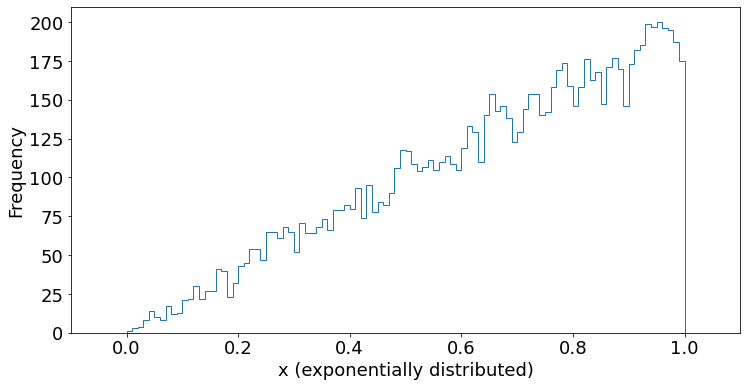

In [32]:
fig2, ax2 = plt.subplots(figsize = (12, 6))

ax2.hist(x_accepted, 
         bins = N_bins, 
         range = (xmin, xmax), 
         histtype = 'step', 
         label = 'histogram' )

ax2.set(xlabel = "x (exponentially distributed)", 
        ylabel = "Frequency", 
        xlim = (xmin-0.1, xmax+0.1));

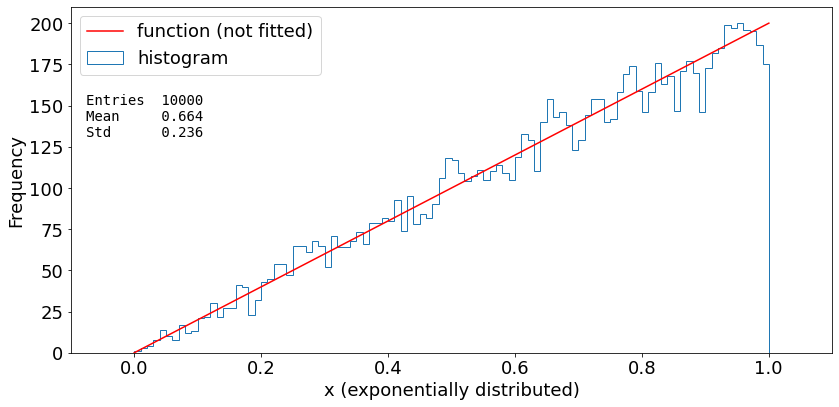

In [34]:
# Plot f(x)
x_axis2 = np.linspace(xmin, xmax, 1000)
y_axis2 = fx_2x(x_axis2)
ax2.plot(x_axis2, y_axis2, 'r-', label='function (not fitted)')

# Define the figure text
d2 = {'Entries': len(x_accepted),
      'Mean': x_accepted.mean(),
      'Std': x_accepted.std(ddof=1),
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.75, text2, ax2, fontsize=14)

# Add legend
ax2.legend(loc='best')
fig2.tight_layout()
    
# Show the figure
fig2

3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method.

4) Fit your data with a third degree polynomial, and check that the coefficients correspond to what you would expect.

In [76]:
# f(x):
def fx_x3(x) :
    return x**3

x2_max = 1.4 # Find out what good interval is? Try different numbers
x2_min = 0

y2_max = fx_x3(x2_max) # max value y can take
y2_min = fx_x3(x2_min) # min value y can take

In [77]:
x2_accepted = np.zeros(N_points) # Empty array to be filled in with accepted values

for i in range(N_points):
    
    while True:
        x2_test = r.uniform(x2_min, x2_max)
        y2_test = r.uniform(y2_min, y2_max)
    
        if (y2_test < fx_x3(x2_test)):
            break
    
    x2_accepted[i] = x2_test        # numbers that are not rejected stored here

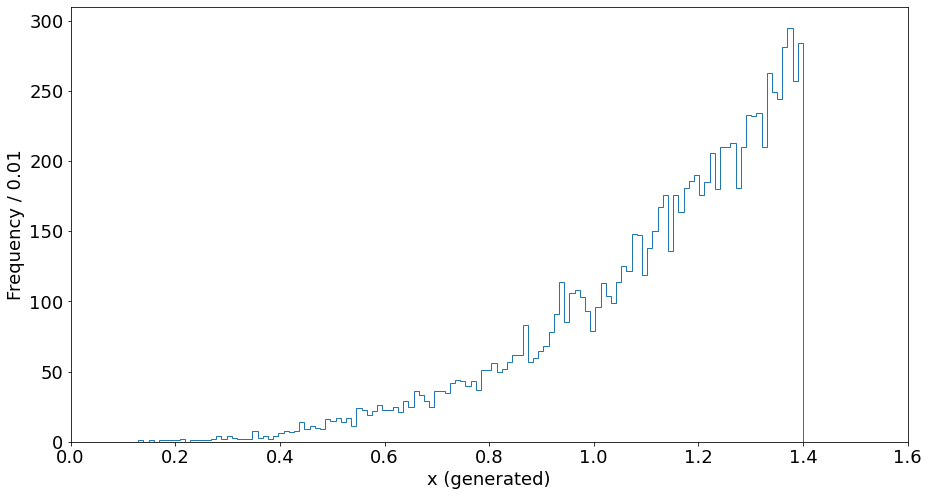

In [79]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.hist(x2_accepted, 
        bins = 141, 
        range = (x2_min, x2_max), 
        histtype = 'step', 
        label = 'x (accept/reject)')

ax.set(xlabel = "x (generated)", 
       ylabel = "Frequency / 0.01", 
       xlim = (xmin, x2_max + 0.2));   # Note upper limit set a bit above!

Let f (x) = Cx**−0.9 be proportional to a PDF for x ∈ [0.005, 1]





In order to fulfill the normalization criteria of a PDF, what value should C have?

In [92]:
c = sy.Symbol("c")
sy.integrate(c * x**-0.9, (x, 0.005, 1))

# CHECK STEP-BY-STEP INTEGRAL TO MAKE SURE NO DIVISION BY ZERO IF WANTING REJECTION SAMPLING

4.11295981347525*c

In [93]:
# setting equal to 1 and isolating c gives 0.24

Produce 10000 random numbers distributed according to f (x) and plot these.

In [219]:
def f_x(x):
    return 0.24 * x**-0.9

x3_max = 1
x3_min = 0.005

y3_max = f_x(x3_max) # max value y can take
y3_min = f_x(x3_min) # min value y can take

In [240]:
x3_accepted = np.zeros(N_points) # Empty array to be filled in with accepted values

for i in range(N_points):
    
    while True:
        x3_test = r.uniform(x3_min, x3_max)
        y3_test = r.uniform(y3_min, y3_max)
    
        if (y3_test < f_x(x3_test)):
            break
    
    x3_accepted[i] = x3_test        # numbers that are not rejected stored here

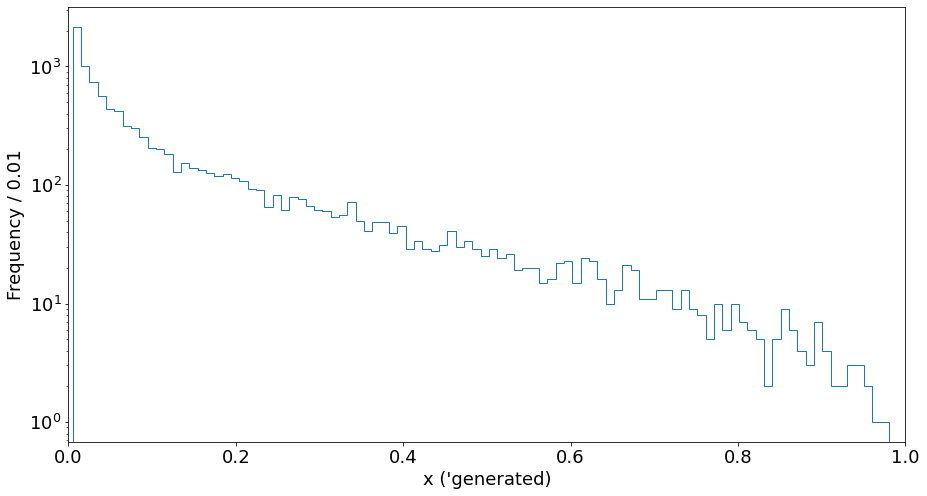

In [241]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.hist(x3_accepted, 
        bins = 100, 
        range = (x3_min, x3_max), 
        histtype = 'step', 
        label = 'x (accept/reject)')

ax.set(xlabel = "x ('generated)", 
       ylabel = "Frequency / 0.01", 
       xlim = (0, x3_max));   # Note upper limit set a bit above!

ax.set_yscale('log')

Let t be a sum of 50 random values from f (x), and generate 1000 values of t. Do they follow
a Gaussian distribution?

In [253]:
sum_of = sum(f_x(r.uniform(low = 0, 
                                    high = 1, 
                                    size = N_points)) for i in range(50))

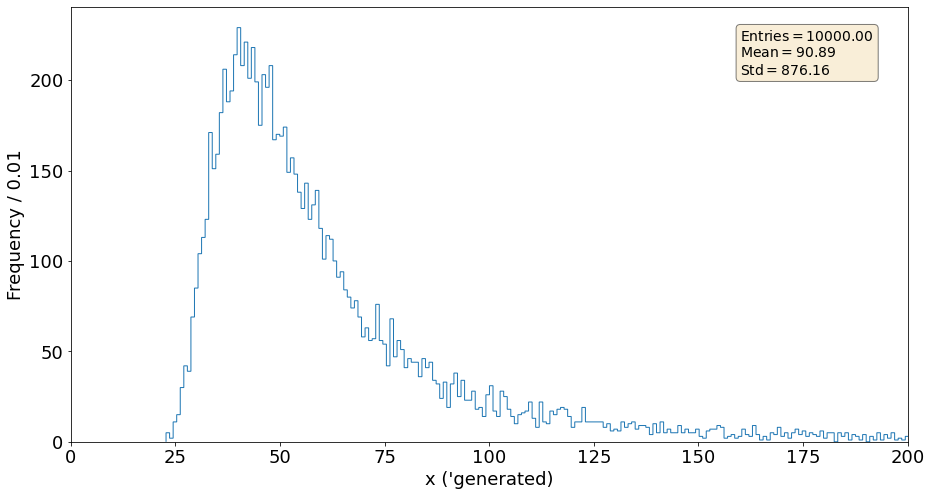

In [202]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.hist(sum_of, 
        bins = 100000,
        histtype = 'step', 
        label = 'x (accept/reject)')

# Define figure text
textstr = '\n'.join((
    r'$\mathrm{Entries}=%.2f$' % (len(sum_of), ),
    r'$\mathrm{Mean}=%.2f$' % (sum_of.mean(), ),
    r'$\mathrm{Std}=%.2f$' % (sum_of.std(ddof=1), )))
# Plot figure text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.80, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set(xlabel = "x ('generated)", 
       ylabel = "Frequency / 0.01", 
       xlim = (0, 200));

#96.5       std=451
